## PCA 소개
PCA는 Principal Component Anaylysis의 약자로, 주성분 분석이라고 부릅니다. PCA는 지금까지 배운 알고리즘과 전혀 다른 방식의 알고리즘입니다. 비지도 학습에 속하기 때문에 당연히 종속변수는 존재하지 않고, 어떤 것을 예측하지도 분류하지도 않습니다. PCA의 목적은 데이터의 차원을 축소하는 데 있습니다. 차원 축소를 간단히 말하면 변수의 개수를 줄이되, 가능한 그 특성을 보존해내는 기법입니다. PCA는 기존의 변수 중 일부를 그대로 선택하는 방식이 아니라, 기존 변수들의 정보를 모두 반영하는 새로운 변수들을 만드는 방식으로 차원 축소를 합니다.

## 3.1.1 문제 정의
데이터의 차원을 축소하여 이해하기 쉽게 시각화하라.

12장 K-평균 군집화에서 사용한 예측 결과가 포함되니 최종 고객 분석 데이터셋을 사용합니다. PCA를 사용해 시각화를 용이하게 하는 방법을 학습합니다.

## 13.1.2 라이브러리 및 데이터 불러오기


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://raw.githubusercontent.com/snkn1959/data_source/main/customer_pca.csv'
customer = pd.read_csv(file_url)

In [2]:
customer.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
0,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
1,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,3
2,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,1
3,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
4,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,3


In [3]:
customer_X = customer.drop('label', axis = 1)  # 독립변수 지정
customer_y = customer['label']  # 종속변수 지정

## 13.1.2 그래프 표현을 위한 차원축소


In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2)  # 주성분 개수 지정

In [6]:
pca.fit(customer_X)  # 학습
customer_pca = pca.transform(customer_X)  # 변환

In [7]:
customer_pca  # 결과 확인

array([[-3.92906072e+00,  1.02604491e-01],
       [ 3.10758276e+00, -1.74887930e+00],
       [ 3.02379272e+00,  3.21221215e+00],
       [-4.28241767e+00,  1.13781030e-02],
       [ 2.59065802e+00, -1.90612064e+00],
       [ 8.70343520e-01, -1.79154348e-02],
       [-1.16508938e+00,  2.00387900e+00],
       [ 1.41163657e+00, -1.21220170e+00],
       [ 1.79302072e-01, -1.15337545e+00],
       [-2.74166293e+00, -3.48112299e-02],
       [ 4.03108363e-01, -2.56426911e-01],
       [-4.32816586e+00,  1.09280479e-01],
       [-1.06779010e+00, -4.71336448e-01],
       [-3.54208654e+00,  2.09373453e-01],
       [ 3.00321739e+00,  6.85140300e-02],
       [ 5.08464052e+00, -1.92234923e+00],
       [-1.39044460e+00,  3.22162225e-01],
       [-2.64318989e+00, -4.59744830e-01],
       [-7.37714393e-01, -9.30393910e-01],
       [-3.93420145e+00,  1.62749639e-01],
       [ 3.16675507e-01, -4.22288613e-01],
       [ 7.31864853e+00,  5.17885391e-02],
       [ 6.60448573e-01, -1.13828656e+00],
       [-3.

In [8]:
# 데이터프레임으로 변환
customer_pca = pd.DataFrame(customer_pca, columns = ['PC1','PC2'])

In [9]:
# 데이터 합치기
customer_pca = customer_pca.join(customer_y)

In [10]:
customer_pca.head()

,PC1,PC2,label
0,-3.929061,0.102604,0
1,3.107583,-1.748879,3
2,3.023793,3.212212,1
3,-4.282418,0.011378,0
4,2.590658,-1.906121,3


<Axes: xlabel='PC1', ylabel='PC2'>

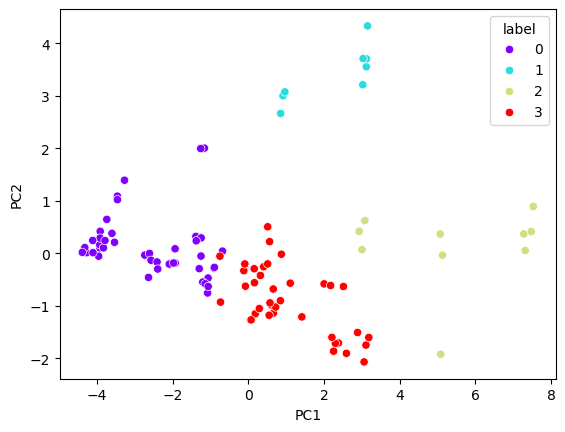

In [11]:
# 산점도 그리기
sns.scatterplot(x='PC1',y='PC2', data = customer_pca, hue = 'label', palette='rainbow')

In [12]:
# 주성분과 변수의 관계 확인
pca.components_

array([[ 0.3484681 ,  0.32447242,  0.30303652,  0.14186907,  0.30618347,
         0.31297263,  0.29718852,  0.3045823 ,  0.29341337,  0.30287672,
         0.32053447,  0.08927503],
       [ 0.05827591,  0.06034266,  0.15264674, -0.54435586,  0.03109502,
         0.03790586,  0.23809571, -0.2315275 , -0.2471928 , -0.20898284,
         0.14479001,  0.65946781]])

In [13]:
# 데이터프레임으로 변환
df_comp = pd.DataFrame(pca.components_,columns=customer_X.columns)

In [14]:
df_comp.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,0.348468,0.324472,0.303037,0.141869,0.306183,0.312973,0.297189,0.304582,0.293413,0.302877,0.320534,0.089275
1,0.058276,0.060343,0.152647,-0.544356,0.031095,0.037906,0.238096,-0.231528,-0.247193,-0.208983,0.144790,0.659468


- 왼쪽 인덱스 0과 1은 각각 주성분 PC1과 PC2를 의미
- 컬럼명에는 기존 데이터의 독립변수들이 나열되어 있음
예를 들어 인덱스 0(PC1)과 amt와 상관관계는 0.35이므로 PC1이 높다는 것은 그만큼의 크기만큼 amt가 높다는 의미
다른 예로 인덱스 1(PC2)와 category_gas_transport를 보면 -0.54로 PC2가 클수록 category_gas_transport에 해당하는 값은 낮다는의미

<Axes: >

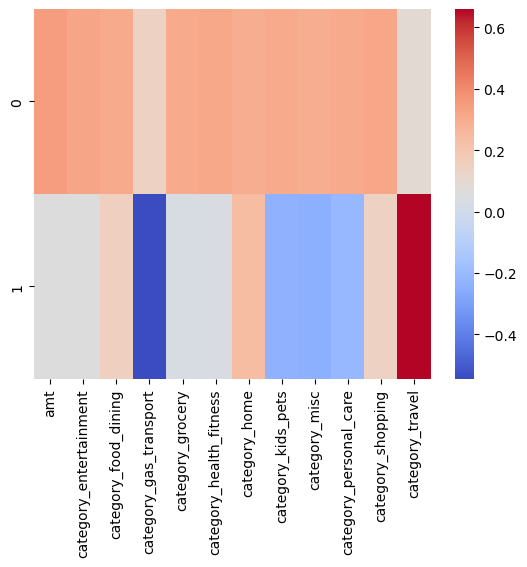

In [15]:
# 히트맵 그리기
sns.heatmap(df_comp,cmap='coolwarm')

# 13.2 속도와 예측력을 향상시키기 : 익명 데이터셋
## 13.2.1 문제 정의
데이터의 차원을 축소해 학습 시간을 줄이고 성능을 향상시켜라.

변수 개수가 천 개가 넘는 데이터셋입니다. 변수 이름이 익명 처리되어있습니다. 차원 축소 전후의 모델 학습 속도 및 예측 결과를 비교해보겠습니다.

## 13.2.2 다차원 데이터 불러오기

In [16]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/anonymous.csv'
anonymous = pd.read_csv(file_url)

In [17]:
anonymous.head()

,class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V4287,V4288,V4289,V4290,V4291,V4292,V4293,V4294,V4295,V4296
0,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.25777,0.12220,0.348620,0.12957,0.43846,-0.108020,0.128330,0.318820,-0.041559,0.22589
1,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.15316,0.14062,-0.030201,0.10134,-0.14546,-0.166650,0.401300,0.035392,0.019906,0.31952
2,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.40122,0.13790,0.138350,0.15746,0.51216,-0.330690,0.070346,0.179250,-0.188740,0.16386
3,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,-0.15587,-0.26686,0.158930,-0.13204,0.32221,-0.042086,0.588970,0.526990,-0.574320,0.20891
4,1,0.0,0.0,0.56758,0.0,0.0,0.0,0.0,0.82585,0.83788,...,0.24020,0.44605,-0.163560,0.45311,0.59073,0.356800,0.395780,0.035871,-0.293430,0.38124


In [18]:
anonymous['class'].mean()  # 종속 변수의 평균 확인

0.25

In [19]:
anonymous.isna().sum().sum()  # 결측치 확인

0

## 13.2.3 PCA에 따른 모델링 성능/결과 비교하기


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(anonymous.drop('class', axis=1), anonymous['class'], test_size=0.2, random_state=100)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # 스케일러 객체 생성
scaler.fit(X_train)  # 학습

X_train_scaled = scaler.transform(X_train)  # 학습셋 변환
X_test_scaled = scaler.transform(X_test)  # 시험셋 변환

In [22]:
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(random_state=100)  # 모델 객체 생성

In [23]:
import time
start_time = time.time()
model_1.fit(X_train_scaled, y_train)
print(time.time() - start_time)  # 할습 소요시간 출력

107.98055696487427


In [24]:
from sklearn.metrics import accuracy_score, roc_auc_score

pred_1 = model_1.predict(X_test_scaled)  # 예측
accuracy_score(y_test, pred_1)  # 정확도 확인

0.958

In [25]:
proba_1 = model_1.predict_proba(X_test_scaled)  # 예측(0~1)
roc_auc_score(y_test, proba_1[:,1])  # AUC 확인

0.9982541957107813

In [26]:
pca = PCA(n_components=2)  # 주성분 개수 지정
pca.fit(X_train_scaled)  # 학습

PCA(n_components=2)

- explained_variance_ratio_  
기존 변수들의 분산을 주성분의 어느 비율로 설명하는지 보여주는 지표.
1은 기존 변수들의 분산을 100% 대변한다는 의미입니다. 여기에서 '변수들의 분산'은 각 변수들이 가지는 데이터 분포입니다. 쉽게 말하면 기존 변수들의 특성을 얼마만큼 내포하고 있는가를 보여줍니다.

In [27]:
pca.explained_variance_ratio_  # 데이터 반영 비율 확인

array([0.04992445, 0.03331407])

둘을 합쳐봐야 기존데이터의 0.08정도의 정보만 반영한다는 의미

=> 엘보우 기법에서처럼 다양한 숫자의 주성분을 만들어보고, 반복문에서 explained_variance_ratio_의 결과를 리스트에 넣어 확인

In [28]:
var_ratio = []  # 빈 리스트 생성

In [29]:
for i in range(100,550, 50):
    pca = PCA(n_components=i)  # 주성분의 개수 지정
    pca.fit_transform(X_train_scaled)  # 학습 및 변환
    ratio = pca.explained_variance_ratio_.sum() # ❶ 데이터 반영 비율 합
    var_ratio.append(ratio)  # 반영 비율 합을 리스트에 추가

<Axes: >

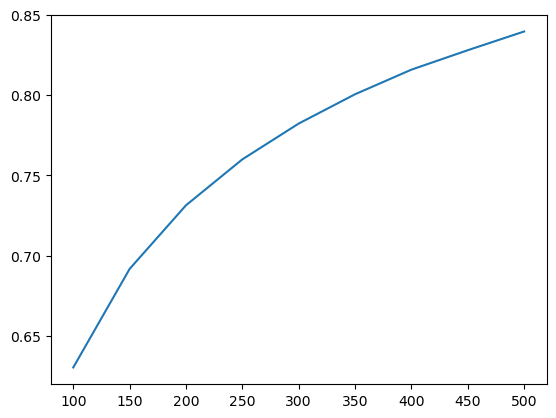

In [30]:
sns.lineplot(x=range(100,550,50), y=var_ratio)  # 선형 그래프 그리기

약 80%를 기준으로 잡고, 이에 가장 근사치인 400을 채택하여, 주성분이 400개인 데이터를 생성

In [31]:
pca = PCA(n_components=400, random_state = 100)  # 주성분 개수 지정
pca.fit(X_train_scaled) # ❶ 학습
X_train_scaled_pca = pca.transform(X_train_scaled) # ❷ 변환
X_test_scaled_pca = pca.transform(X_test_scaled)   # ❸ 변환

In [32]:
model_2 = RandomForestClassifier(random_state=100)  # 모델 객체 생성
start_time = time.time()
model_2.fit(X_train_scaled_pca, y_train)  # 학습
print(time.time() - start_time)  # 학습 소요시간 출력

68.87802934646606


In [33]:
pred_2 = model_2.predict(X_test_scaled_pca)  # 예측
accuracy_score(y_test, pred_2)  # 정확도 확인

0.98925

In [34]:
proba_2 = model_2.predict_proba(X_test_scaled_pca)  # 예측
roc_auc_score(y_test, proba_2[:,1])  # AUC 확인

0.9982517669346417